# AST304 Computational Project 3

### Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald

In [1]:
# Packages needed, may not be in git yet
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.constants as sc
%matplotlib inline
from eos import *
from astro_const import *
from structure import *
from reactions import *
from scipy.optimize import brentq
from astro_const import *
from zams import *
sns.set_style("whitegrid")

## Testing our functions:

In [2]:
!python -m pytest

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0
rootdir: /Users/jkho/Documents/MSU Fall 2022/AST 304/Project 3/AST_Final_Project
plugins: anyio-2.2.0
collected 7 items                                                              

test_const.py .                                                          [ 14%]
test_eos.py ..                                                           [ 42%]
test_reactions.py .                                                      [ 57%]
test_structure.py .                                                      [ 71%]
test_zams.py ..                                                          [100%]

=============================== warnings summary ===============================
../../../../../opt/anaconda3/lib/python3.8/site-packages/astropy/version.py:26
  /Users/jkho/opt/anaconda3/lib/python3.8/site-packages/astropy/version.py:26: DeprecationWarning: dist

In [3]:
!python testing.py

chemistry passed testing
adiabatic EOS passed testing
reactions passed testing
central temperature passed testing
effective temperature passed testing
surface luminosity passed testing


In [4]:
delta_m = 1e-7
eta = 1e-18
xi = 1e-2

Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]
mu = mean_molecular_weight(Z,A,X)
Pc, rhoc, Tc = central_thermal(0.1,0.1,mu) # Mass and radius are in units of solar
m, radius, pressure, Luminosity = integrate(0.1, 0.1, delta_m, eta, xi, comp, max_steps=10000, pp_factor=1.0) # Pc,rhoc,Tc,delta_m,eta,xi,mu,XH

print(m[-1],radius[-1],pressure[-1],Luminosity[-1])

1.9886398741527386e+29 69568391.92955771 0.08707917316184112 1.698111750353341e+25


In [5]:
delta_m = 2e-7
eta = 2e-18
xi = 2e-2

m, radius, pressure, Luminosity = integrate(0.1, 0.1, delta_m, eta, xi, comp, max_steps=10000, pp_factor=1.0) # Pc,rhoc,Tc,delta_m,eta,xi,mu,XH

print(m[-1],radius[-1],pressure[-1],Luminosity[-1])

1.988821343432156e+29 69566399.38831675 0.174615691511376 1.6996260616764587e+25


Above, we can see that our delta, eta, and xi values can be changed slightly and they do not greatly affect our end values (Except for pressure, since eta directly affects this)

# 2.9

In [6]:
def g(R,M,comp,delta_m,eta,xi,pp_factor = 1.0):
    m,r,p,l = integrate(M,R,delta_m,eta,xi,comp,max_steps=10000,pp_factor=pp_factor)
    L = l[-1]
    R_new = r[-1]
    T_eff = Teff(M)
    Lwant = surface_luminosity(T_eff,R_new)
    return(Lwant-L)

# 2.10

In [7]:
masses = np.array([0.1,0.15,0.2,0.3])
Teffs = np.zeros(len(masses))
Radii = np.zeros(len(masses))
Ls = np.zeros(len(masses))
Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]
mu = mean_molecular_weight(Z,A,X)

for i in range(len(masses)):
    R = brentq(g,0.001,1,args = (masses[i],comp,delta_m,eta,xi))
    Radii[i] = R
    
    m,r,p,l = integrate(masses[i],R,delta_m,eta,xi,comp,max_steps=10000,pp_factor=1.0)
    P_c,rho_c,T_c = central_thermal(masses[i],R,mu)
    rho, T = get_rho_and_T(p,P_c,rho_c,T_c)
    Ls[i] = l[-1]
    Teffs[i] = Teff(masses[i])

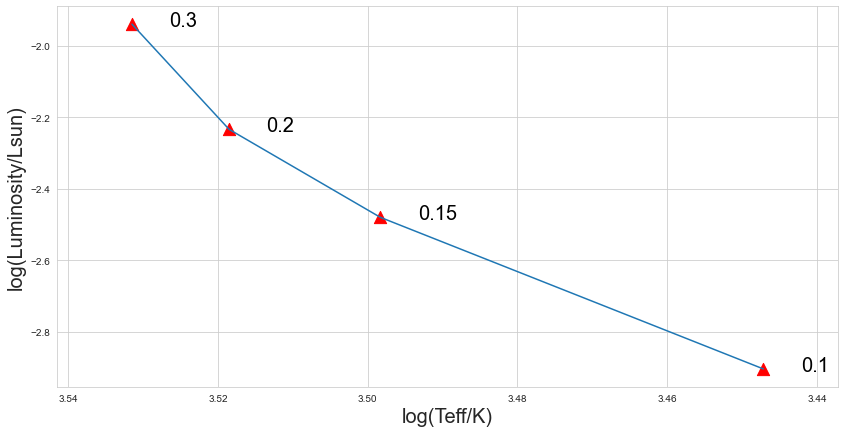

In [8]:
Ls = np.log10(Ls/Lsun)
Ts = np.log10(Teffs)

plt.figure(figsize=(14,7))
plt.plot(Ts,Ls)
plt.xlim(Ts[-1]+0.01,Ts[0]-0.01)
plt.ylim(Ls[0]-0.05,Ls[-1]+0.05)
plt.text(Ts[0]-0.005,Ls[0]-0.005,'0.1',size = 20,color='black')
plt.text(Ts[1]-0.005,Ls[1]-0.005,'0.15',size = 20,color='black')
plt.text(Ts[2]-0.005,Ls[2]-0.005,'0.2',size = 20,color='black')
plt.text(Ts[3]-0.005,Ls[3]-0.005,'0.3',size = 20,color='black')
plt.scatter(Ts,Ls,s=150,color = 'red',marker = "^")
plt.xlabel('log(Teff/K)',size = 20)
plt.ylabel('log(Luminosity/Lsun)',size = 20)
plt.show()

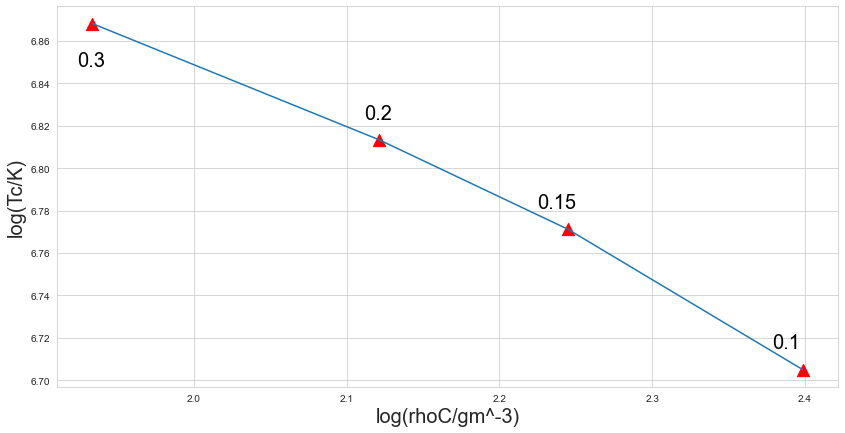

In [9]:
M, z, Pc, rhoc, Tc = central_values(masses,Radii,delta_m,mu, pp_factor=1.0)

rhoc = np.log10(1000*rhoc/(100**3)) # Changing units to g/cm^3
Tc = np.log10(Tc) 

plt.figure(figsize=(14,7))
plt.plot(rhoc,Tc)
plt.scatter(rhoc,Tc,s=150,color = 'red',marker = "^")
plt.text(rhoc[0]-0.02,Tc[0]+0.01,'0.1',size = 20,color='black')
plt.text(rhoc[1]-0.02,Tc[1]+0.01,'0.15',size = 20,color='black')
plt.text(rhoc[2]-0.01,Tc[2]+0.01,'0.2',size = 20,color='black')
plt.text(rhoc[3]-0.01,Tc[3]-0.02,'0.3',size = 20,color='black')
plt.xlabel('log(rhoC/gm^-3)',size = 20)
plt.ylabel('log(Tc/K)',size = 20)
plt.show()

# 2.11

In [10]:
M = 0.3
R = Radii[-1]
m,r,p,l = integrate(M,R,delta_m,eta,xi,comp,max_steps=10000,pp_factor=1.0)
Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]
mu = mean_molecular_weight(Z,A,X)
P_c,rho_c,T_c = central_thermal(M,R,mu)
rho, T = get_rho_and_T(p,P_c,rho_c,T_c)

Text(0, 0.5, 'Temperature [K]')

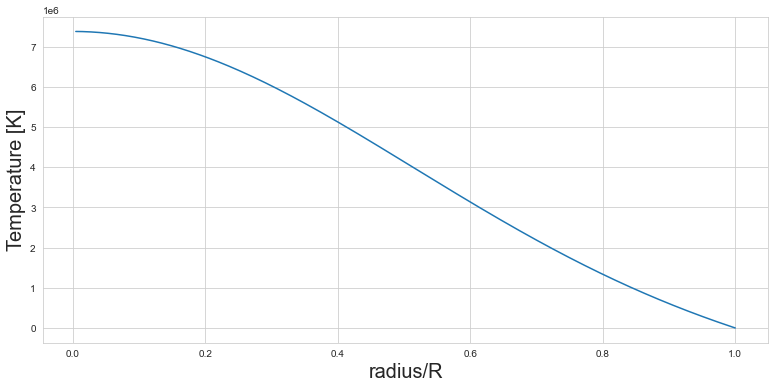

In [11]:
plt.figure(figsize = (13,6))
plt.plot(r/r[-1],T)
plt.xlabel('radius/R',size = 20)
plt.ylabel('Temperature [K]',size = 20)

Text(0, 0.5, 'Temperature [T]')

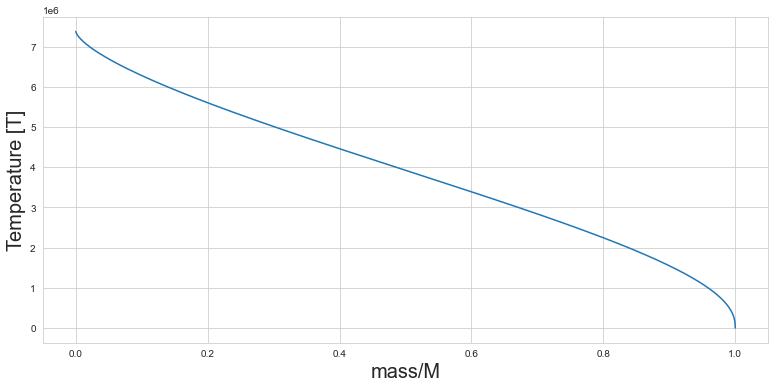

In [12]:
plt.figure(figsize = (13,6))
plt.plot(m/m[-1],T)
plt.xlabel('mass/M',size = 20)
plt.ylabel('Temperature [T]',size = 20)

Text(0, 0.5, 'Luminosity [W]')

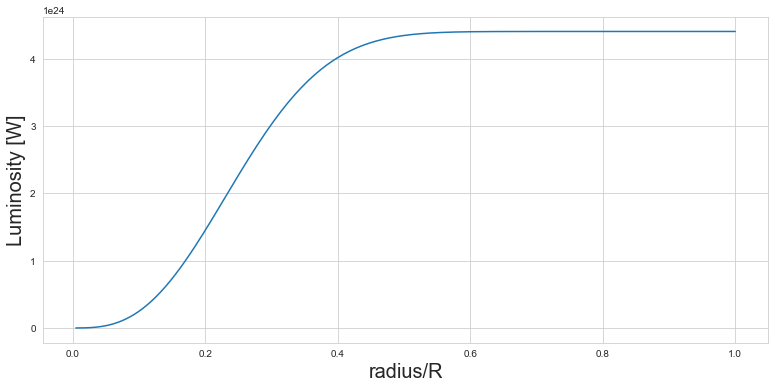

In [13]:
plt.figure(figsize = (13,6))
plt.plot(r/r[-1],l)
plt.xlabel('radius/R',size = 20)
plt.ylabel('Luminosity [W]',size = 20)

Text(0, 0.5, 'Luminsotiy [W]')

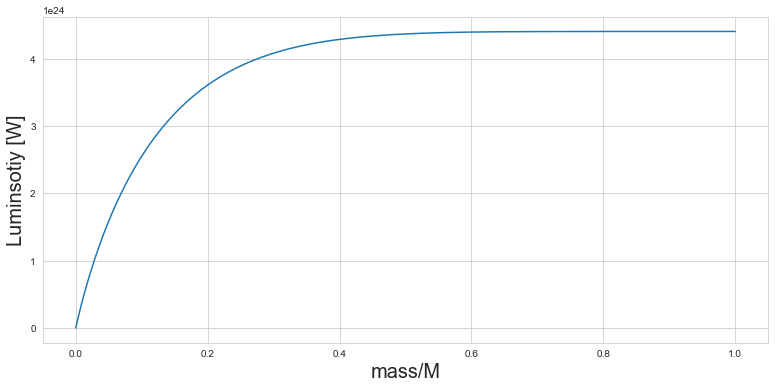

In [14]:
plt.figure(figsize = (13,6))
plt.plot(m/m[-1],l)
plt.xlabel('mass/M',size = 20)
plt.ylabel('Luminsotiy [W]',size = 20)

L(r) reaches ~ 90% of its final value at ~ 0.4R, where R is its final radius. At this radius, we have ~ 0.28M where M is our final mass:

In [15]:
r = r/r[-1]
i = np.where(r >= 0.4)
print(m[i[0][0]]/(M*Msun))

0.2818032551347658


# 3.

Changing the pp_rate to be 10^5 times stronger:

In [16]:
masses = np.array([0.1,0.15,0.2,0.3])
Teffs = np.zeros(len(masses))
Radii_new = np.zeros(len(masses))
Ls = np.zeros(len(masses))
Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]
mu = mean_molecular_weight(Z,A,X)
pp_factor = 1e5

for i in range(len(masses)):
    R = brentq(g,0.001,1,args = (masses[i],comp,delta_m,eta,xi,pp_factor))
    Radii_new[i] = R
    
    m,r,p,l = integrate(masses[i],R,delta_m,eta,xi,comp,max_steps=10000,pp_factor=pp_factor)
    P_c,rho_c,T_c = central_thermal(masses[i],R,mu)
    rho, T = get_rho_and_T(p,P_c,rho_c,T_c)
    Ls[i] = l[-1]
    Teffs[i] = Teff(masses[i])

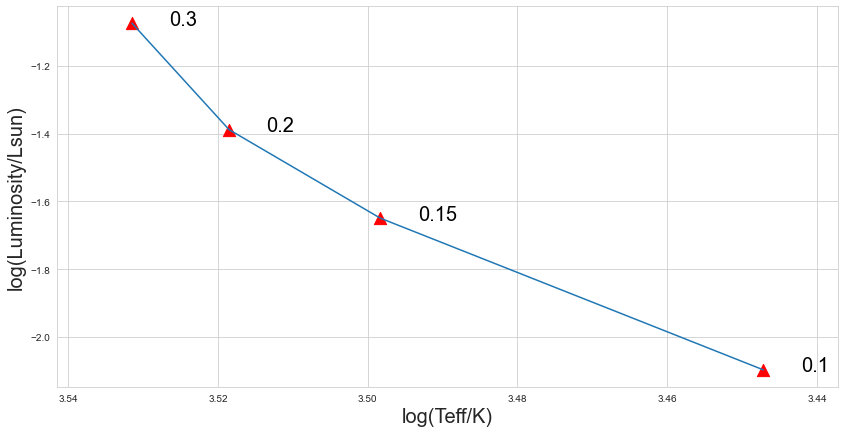

In [17]:
Ls = np.log10(Ls/Lsun)
Ts = np.log10(Teffs)

plt.figure(figsize=(14,7))
plt.plot(Ts,Ls)
plt.xlim(Ts[-1]+0.01,Ts[0]-0.01)
plt.ylim(Ls[0] - 0.05,Ls[-1]+0.05)
plt.text(Ts[0]-0.005,Ls[0]-0.005,'0.1',size = 20,color='black')
plt.text(Ts[1]-0.005,Ls[1]-0.005,'0.15',size = 20,color='black')
plt.text(Ts[2]-0.005,Ls[2]-0.005,'0.2',size = 20,color='black')
plt.text(Ts[3]-0.005,Ls[3]-0.005,'0.3',size = 20,color='black')
plt.scatter(Ts,Ls,s=150,color = 'red',marker = "^")
plt.xlabel('log(Teff/K)',size = 20)
plt.ylabel('log(Luminosity/Lsun)',size = 20)
plt.show()

In [18]:
np.mean(Radii_new/Radii)

2.6227519193891324

If the sun changed in this fashion, surface temperatures on Earth would greatly increase; we can see that the stars' luminosities greatly increased (almost 10 times greater) from our original plots to the first plot above, and the stars' radii increased by a factor of ~ 2.6. In all likelihood, we would not be here.